# Hypothesis 3: "As restriction lifted with Open Texas the rate of infection increased, with a slight delay."

- H0: Open Texas did not affect the rate of infection, considering a slight delay.
- H1: Open Texas increased the rate of infection, considering a slight delay.
- H2: Open Texas decreased the rate of infection, considering a slight delay.

## Import Data

Begin the process of importing and cleaning the data.


In [24]:
import pandas as pd

#Import the Statewide Covid Restriction Dates/Labels/Etc
file = "statewide_covid_restrictions_dates.xlsx"
tx_restrict = pd.read_excel(file, sheet_name="Sheet1", skiprows=1)
tx_restrict['DATE'] = pd.to_datetime(tx_restrict['DATE'], format='%m-%d') #fix the date formatting

#Import the total case reports for all counties in Texas
file = "case_clean.csv"
cases = pd.read_csv(file, index_col=0)
cases = cases.drop(['mean', 'total']) # we will not need these for now

#Clean up the date formatting
from datetime import datetime
import re

pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
dates = [datetime.strptime(pattern.findall(sub)[0], '%m-%d') for sub in cases.keys()]
cases.columns=[pattern.findall(sub)[0] for sub in cases.keys()]

# Statewide COVID-19 Restriction Dates/Labels/Etc.

This is what the covid restrictions table looks like:

In [25]:
# This is what the covid restrictions table looks like:
print(tx_restrict)

        DATE  CATEGORY                                        LABEL  \
0 1900-03-19         3               Declaration of Health Disaster   
1 1900-03-31         1             Non-essential services shut down   
2 1900-04-24         2  Re-opening of businesses with restrictions.   
3 1900-05-01         1                              Re-open Phase I   
4 1900-05-22         1                             Re-open Phase II   
5 1900-06-03         1                            Re-open Phase III   
6 1900-06-12         2             75% Capacity Dine-In Restaurants   
7 1900-06-26         2             50% Capacity dine-in restaurants   
8 1900-07-02         1                      Face coverings required   

                                         DESCRIPTION  
0                                                NaN  
1                Shut down of non-essential services  
2                                                NaN  
3                                       25% capacity  
4  50% capacit

In [26]:
# Right now we only want to look at level '1' entries.

restrict_lv1 = tx_restrict[tx_restrict['CATEGORY'] == 1]
restrict_lv1 = restrict_lv1.reset_index()

#This is what the table looks like:
print(restrict_lv1)


   index       DATE  CATEGORY                             LABEL  \
0      1 1900-03-31         1  Non-essential services shut down   
1      3 1900-05-01         1                   Re-open Phase I   
2      4 1900-05-22         1                  Re-open Phase II   
3      5 1900-06-03         1                 Re-open Phase III   
4      8 1900-07-02         1           Face coverings required   

                                         DESCRIPTION  
0                Shut down of non-essential services  
1                                       25% capacity  
2  50% capacity for dine-in restaurants. 25% capa...  
3  50% capacity most places. 100% capacity for re...  
4                                                NaN  


## Separating off the Case Data

Now that the data sources have been loaded and cleaned, we will separate into five different datasets:

- Group a1: Beginning of testing - End of shut down (+6 days)
- Group a2: Beginning of Re-Opening Phase 1  (+7 days) - Present

The 7 day delay from the beginning of phase 1 is to account for incubation time. We may decide to adjust this later.

In [27]:
begin = pd.Timestamp(restrict_lv1['DATE'][0])
end = pd.Timestamp(restrict_lv1['DATE'][1])

casesT = cases.T
casesT.index = pd.to_datetime(casesT.index, format='%m-%d')
casesT

,anderson,andrews,angelina,aransas,archer,armstrong,atascosa,austin,bailey,bandera,...,willacy,williamson,wilson,winkler,wise,wood,yoakum,young,zapata,zavala
1900-03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-03-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900-09-16,2799.0,406.0,2072.0,307.0,68.0,12.0,621.0,467.0,205.0,114.0,...,1194.0,8252.0,571.0,109.0,705.0,472.0,199.0,258.0,321.0,284.0
1900-09-17,2812.0,410.0,2094.0,308.0,67.0,12.0,623.0,481.0,207.0,112.0,...,1195.0,8296.0,572.0,110.0,710.0,477.0,198.0,259.0,323.0,283.0
1900-09-18,1744.0,412.0,2113.0,310.0,69.0,12.0,626.0,483.0,206.0,112.0,...,1195.0,8331.0,572.0,110.0,712.0,491.0,198.0,266.0,325.0,289.0
1900-09-19,1741.0,412.0,2113.0,316.0,69.0,12.0,627.0,484.0,206.0,112.0,...,1197.0,8385.0,572.0,111.0,712.0,496.0,201.0,266.0,326.0,290.0


In [28]:
#cases_collection_A::
#group a1: beginning - [1]+6 days end of shut down
#group a2: [1]+7 days phase 1 - present
#The 7 day delay is to account for infection time. May adjust later?

#group a1
begin = pd.Timestamp('1900-03-04') #First cases reported
end = pd.Timestamp(restrict_lv1['DATE'][1] + pd.DateOffset(days=6))
cases_collection_a1 = casesT.loc[begin:end]

#group a2
begin = pd.Timestamp(restrict_lv1['DATE'][1] + pd.DateOffset(days=7))
end = pd.Timestamp('1900-09-23') #Current date
cases_collection_a2 = casesT.loc[begin:end]



#group b1: beginning - [1]+6 days end of shut down
#group b2: [1]+7 days phase 1 - [4]+6 days face coverings
#group b3: [4]+7 days face coverings - present
#Compare b1 to b2 and b2 to b3

#group b1
begin = pd.Timestamp('1900-03-04') #First cases reported
end = pd.Timestamp(restrict_lv1['DATE'][1] + pd.DateOffset(days=6))
#cases_collection_B[begin] = casesT.loc[begin:end]
cases_collection_b1 = casesT.loc[begin:end]

#group b2
begin = pd.Timestamp(restrict_lv1['DATE'][1] + pd.DateOffset(days=7))
end = pd.Timestamp(restrict_lv1['DATE'][4] + pd.DateOffset(days=6))
cases_collection_b2 = casesT.loc[begin:end]

#group b3
begin = pd.Timestamp(restrict_lv1['DATE'][4] + pd.DateOffset(days=7))
end = pd.Timestamp('1900-09-23') #Current date
cases_collection_b3 = casesT.loc[begin:end]



## Differences and Means of Data

In order to have a better understanding of the data, we will look only at the daily case data, in case of the cumulative case data that is provided. Then, we will want to know only the mean value of these differences for each of the data groups.

In [29]:
#Get differences in case data in each group
cases_a1_diff = cases_collection_a1.diff()
cases_a2_diff = cases_collection_a2.diff()

cases_b1_diff = cases_collection_b1.diff()
cases_b2_diff = cases_collection_b2.diff()
cases_b3_diff = cases_collection_b3.diff()



In [30]:
#Group a1:
#During lockdown and before
cases_a1_mean = {}

for column in cases_a1_diff:
    cases_a1_mean[column] = cases_a1_diff[column].mean()

cases_a1_mean = pd.DataFrame.from_dict(cases_a1_mean, orient="index")


In [31]:
#Group a2:
#After re-opening of Texas until now
cases_a2_mean = {}

for column in cases_a2_diff:
    cases_a2_mean[column] = cases_a2_diff[column].mean()

cases_a2_mean = pd.DataFrame.from_dict(cases_a2_mean, orient="index")

In [32]:
#Group b1:
#During lockdown and before
cases_b1_mean = {}

for column in cases_b1_diff:
    cases_b1_mean[column] = cases_b1_diff[column].mean()

cases_b1_mean = pd.DataFrame.from_dict(cases_b1_mean, orient="index")

In [33]:
#Group b2:
#During Phases I - III of re-opening
cases_b2_mean = {}

for column in cases_b2_diff:
    cases_b2_mean[column] = cases_b2_diff[column].mean()

cases_b2_mean = pd.DataFrame.from_dict(cases_b2_mean, orient="index")

In [34]:
#Group b3:
#After the mask requirement went into place..
cases_b3_mean = {}

for column in cases_b3_diff:
    cases_b3_mean[column] = cases_b3_diff[column].mean()
    
cases_b3_mean = pd.DataFrame.from_dict(cases_b3_mean, orient="index")

## T-Test Analysis

We will compare three sets of data:
- Group a1 and Group a2
- Group b1 and Group b2
- Group b2 and Group b3


In [35]:
from scipy.stats import ttest_ind

##ttest usage borrowed from Evan in hypothesis 4

#a1: From beginning of testing until end of shut down (+6 days)
#a2: From beginning of Phase 1 (+7 days) to present
ttest, pval = ttest_ind(cases_a1_mean, cases_a2_mean, axis=0)
print("Population set {c}, P = {p}".format(c = 1, p = pval))

#b1: From beginning of testing until end of shut down (+6 days)
#b2: From beginning of Phase 1 (+7 days) to face masks required (+6 days)
#b3: From beginning of Masks required (+7 days) to present
ttest, pval = ttest_ind(cases_b1_mean, cases_b2_mean, axis=0)
print("Population set {c}, P = {p}".format(c =2, p = pval))

ttest, pval = ttest_ind(cases_b2_mean, cases_b3_mean, axis=0)
print("Population set {c}, P = {p}".format(c = 3, p = pval))

Population set 1, P = [0.00031813]
Population set 2, P = [0.00164697]
Population set 3, P = [0.05390474]


## Visualizing the Data


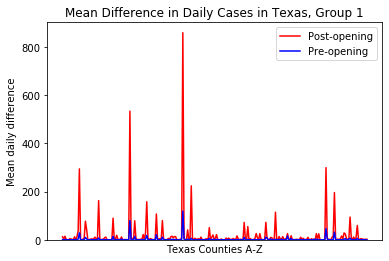

In [36]:
########
# Visualizations of the data

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

ax= plt.gca()

ax.title.set_text('Mean Difference in Daily Cases in Texas, Group 1')
ax.set_ylabel('Mean daily difference')
ax.set_xlabel('Texas Counties A-Z')
plt.plot(cases_a2_mean, color="red", label="Post-opening") #find better colors later
plt.plot(cases_a1_mean, color="blue", label="Pre-opening")
plt.ylim(bottom=0)
plt.xticks([])
ax.legend(ncol=1)

#Save image
plt.savefig('hypothesis3_group1.png')

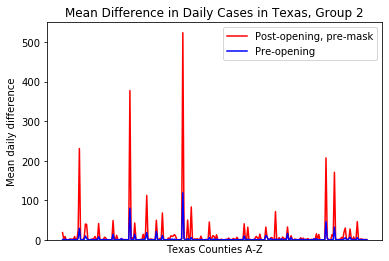

In [37]:

ax2= plt.gca()

ax2.title.set_text('Mean Difference in Daily Cases in Texas, Group 2')
ax2.set_ylabel('Mean daily difference')
ax2.set_xlabel('Texas Counties A-Z')
plt.plot(cases_b2_mean, color="red", label="Post-opening, pre-mask") #find better colors later
plt.plot(cases_b1_mean, color="blue", label="Pre-opening")
plt.ylim(bottom=0)
plt.xticks([])
ax2.legend(ncol=1)

#Save image
plt.savefig('hypothesis3_group2.png')

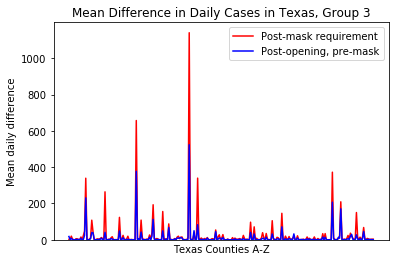

In [38]:

ax3= plt.gca()

ax3.title.set_text('Mean Difference in Daily Cases in Texas, Group 3')
ax3.set_ylabel('Mean daily difference')
ax3.set_xlabel('Texas Counties A-Z')
plt.plot(cases_b3_mean, color="red", label="Post-mask requirement")
plt.plot(cases_b2_mean, color="blue", label="Post-opening, pre-mask") #find better colors later
plt.ylim(bottom=0)
plt.xticks([])
ax3.legend(ncol=1)

#Save image
plt.savefig('hypothesis3_group3.png')